<a href="https://colab.research.google.com/github/Felimk/Data-Visualization-project/blob/main/Data_visualization_projec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

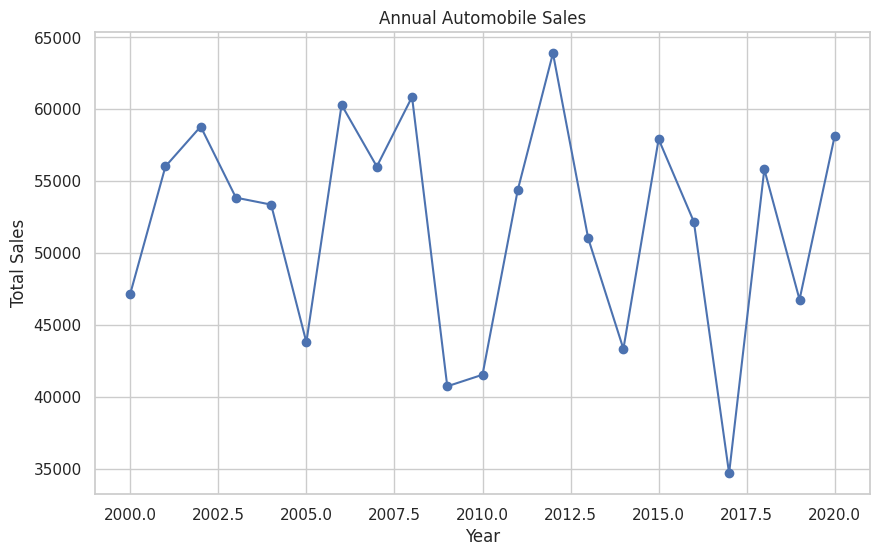

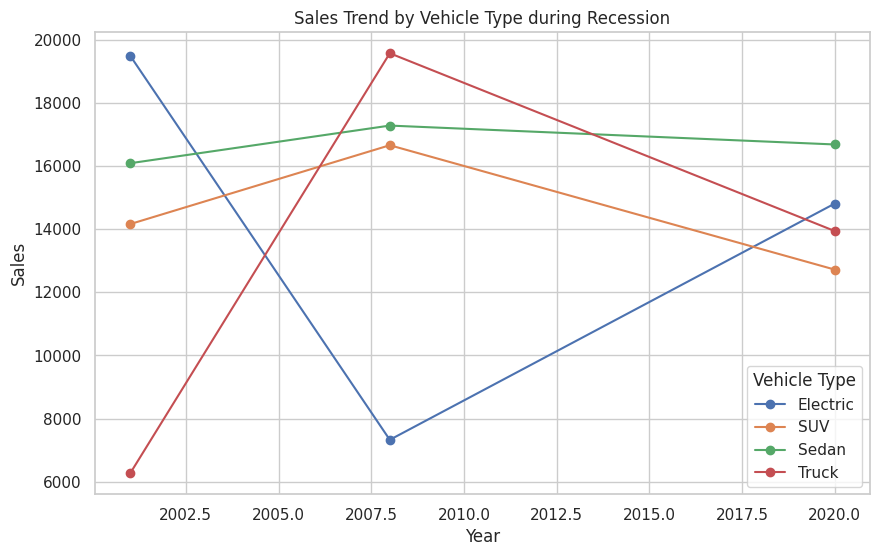

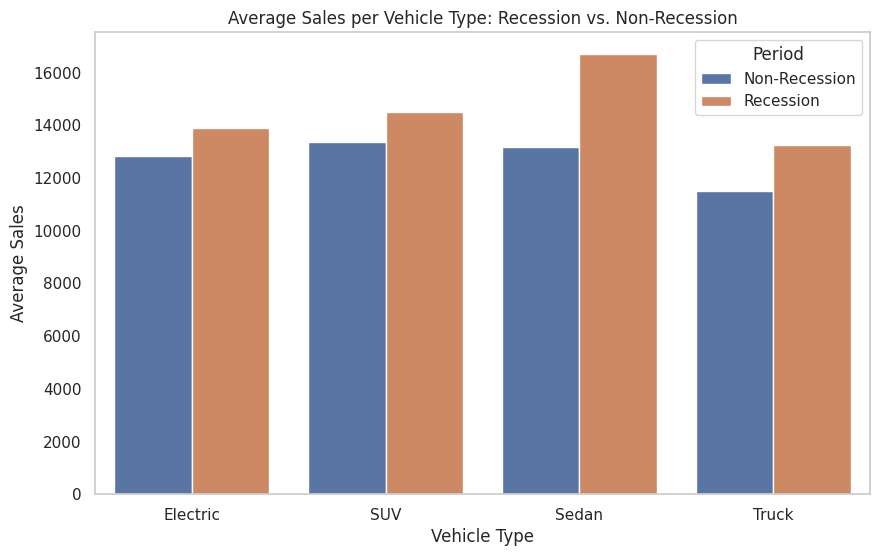

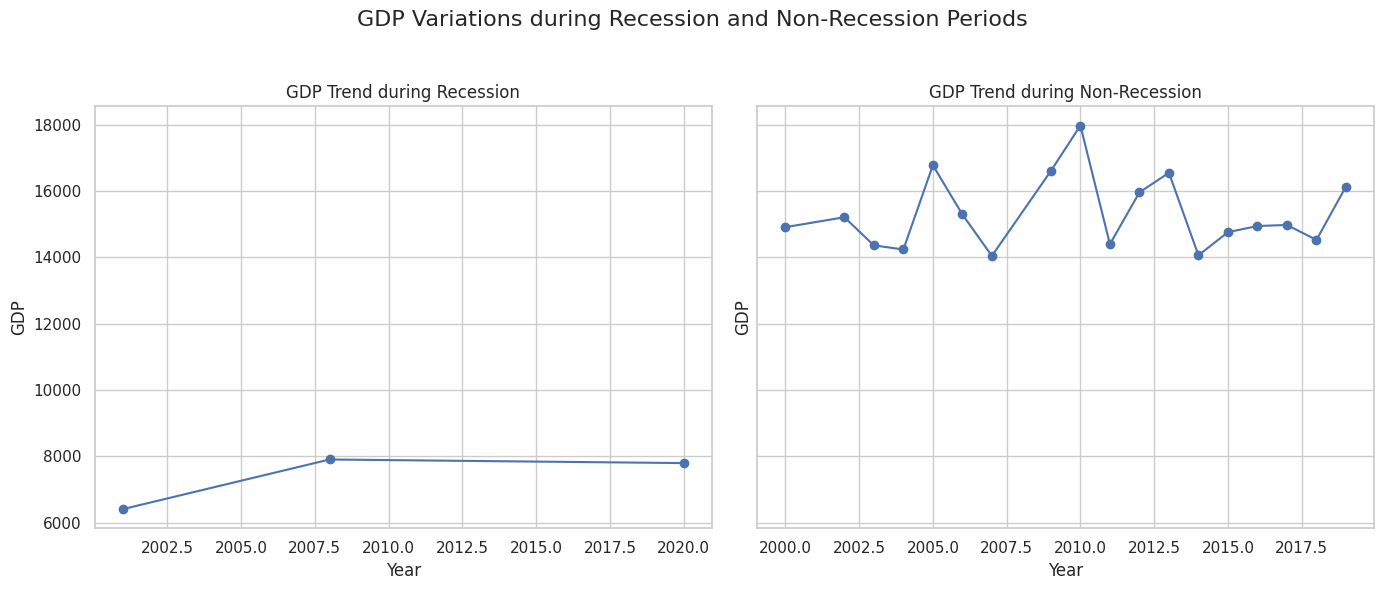

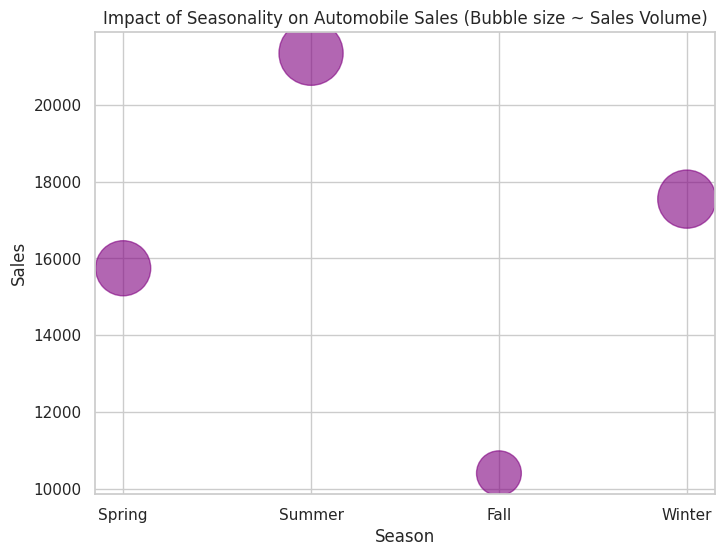

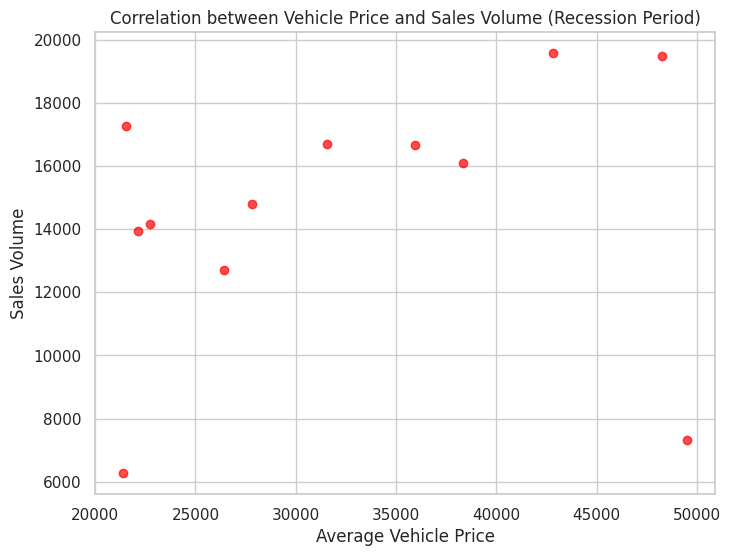

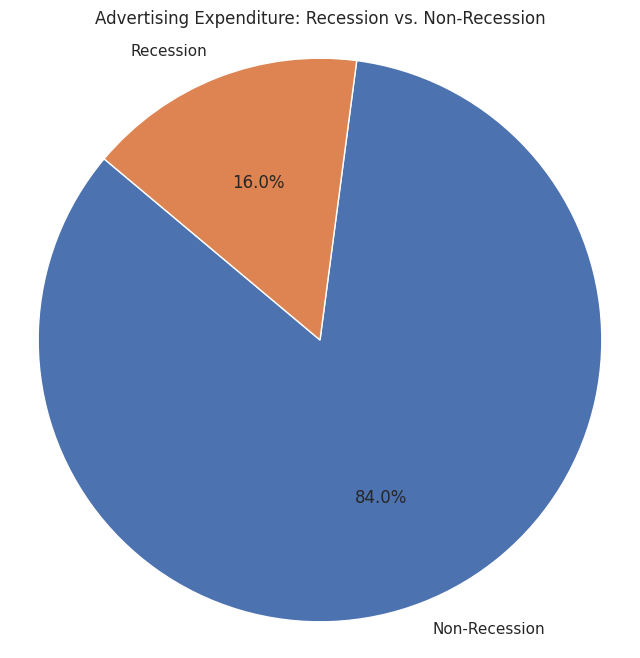

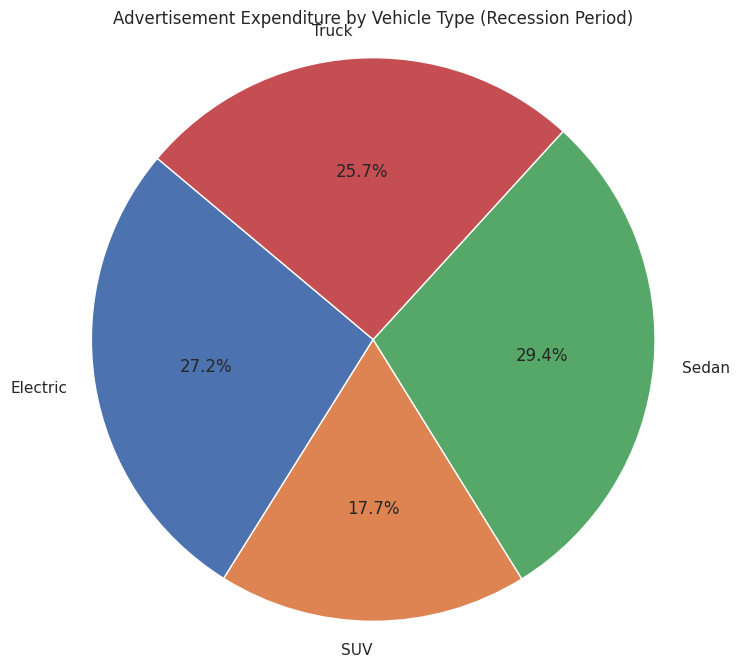

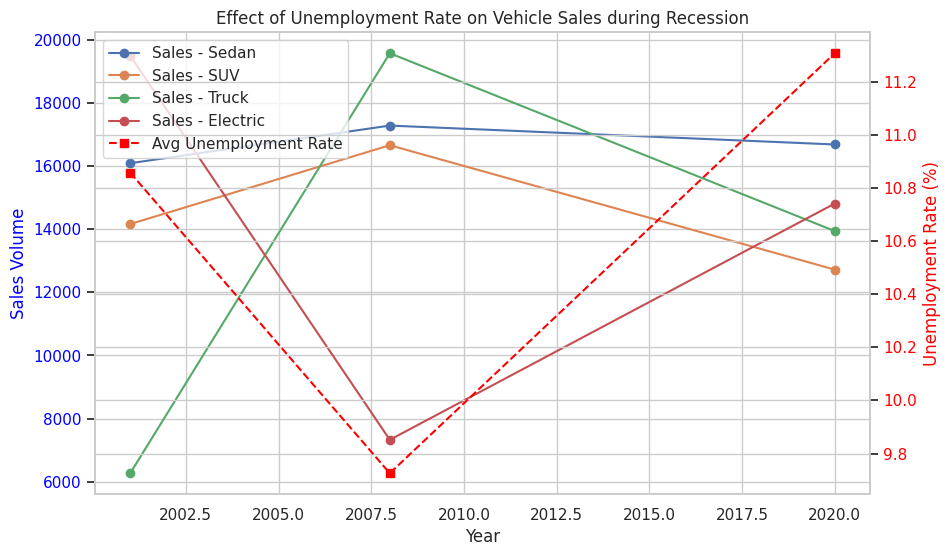

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This ensures that plots show up inline in Jupyter Notebook.
%matplotlib inline

# -------------------------------
# Data Preparation: Synthetic Data
# -------------------------------
np.random.seed(42)  # For reproducibility

# Define the years and vehicle types
years = np.arange(2000, 2021)
vehicle_types = ['Sedan', 'SUV', 'Truck', 'Electric']

# Specify recession years
recession_years = [2001, 2008, 2020]

# Build the dataset (each record represents a given year and vehicle type)
data = []
for year in years:
    period = 'Recession' if year in recession_years else 'Non-Recession'
    for vt in vehicle_types:
        # Random sales between 5,000 and 20,000 units
        sales = np.random.randint(5000, 20000)
        # GDP: assume lower GDP during recession years
        gdp = np.random.uniform(5000, 10000) if period == 'Recession' else np.random.uniform(10000, 20000)
        # Average vehicle price between $20,000 and $50,000
        avg_price = np.random.uniform(20000, 50000)
        # Unemployment rate: higher during recession periods
        unemp = np.random.uniform(7, 15) if period == 'Recession' else np.random.uniform(3, 10)
        # Advertising expenditure between $100,000 and $500,000
        ad_exp = np.random.uniform(100000, 500000)
        data.append([year, vt, period, sales, gdp, avg_price, unemp, ad_exp])

# Create the main DataFrame
df = pd.DataFrame(data,
                  columns=['Year', 'Vehicle_Type', 'Period', 'Sales', 'GDP', 'Avg_Price', 'Unemployment_Rate', 'Ad_Exp'])

# Create a separate seasonal dataset for Task 1.5
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
season_data = []
for season in seasons:
    # Random sales for each season
    season_sales = np.random.randint(10000, 30000)
    season_data.append([season, season_sales])
df_season = pd.DataFrame(season_data, columns=['Season', 'Sales'])

# -------------------------------
# TASK 1.1:
# Line chart using pandas to show how automobile sales fluctuate from year to year.
# -------------------------------
# Aggregate total annual sales (summing sales across all vehicle types)
annual_sales = df.groupby('Year')['Sales'].sum()

# Plot using pandas' built-in plotting
annual_sales.plot(kind='line', marker='o', figsize=(10, 6), title='Annual Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# -------------------------------
# TASK 1.2:
# Plot different lines for vehicle types during recession periods and analyse trends.
# -------------------------------
# Filter data for recession period only
df_recession = df[df['Period'] == 'Recession']

# Create a pivot table: rows = Year, columns = Vehicle_Type, values = Sales
pivot_recession = df_recession.pivot_table(values='Sales', index='Year', columns='Vehicle_Type', aggfunc='sum')

# Plot the sales trends for each vehicle type during recession
pivot_recession.plot(kind='line', marker='o', figsize=(10, 6), title='Sales Trend by Vehicle Type during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

# *Analysis Tip:* By examining the slopes and turning points in the lines, you can assess if certain vehicle types (e.g., SUVs vs. Sedans)
# respond differently during recession periods.

# -------------------------------
# TASK 1.3:
# Using Seaborn to create a barplot visualization to compare the sales trend per vehicle type
# for a recession period with a non-recession period.
# -------------------------------
# Aggregate average (or total) sales per Vehicle_Type for each Period
sales_by_type_period = df.groupby(['Vehicle_Type', 'Period'])['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Sales', hue='Period', data=sales_by_type_period)
plt.title('Average Sales per Vehicle Type: Recession vs. Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.show()

# -------------------------------
# TASK 1.4:
# Use sub plotting to compare variations in GDP during recession and non-recession periods.
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, period in zip(axes, ['Recession', 'Non-Recession']):
    subset = df[df['Period'] == period]
    # Calculate average GDP per year for the current period
    gdp_trend = subset.groupby('Year')['GDP'].mean()
    ax.plot(gdp_trend.index, gdp_trend.values, marker='o')
    ax.set_title(f'GDP Trend during {period}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.grid(True)

fig.suptitle('GDP Variations during Recession and Non-Recession Periods', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# -------------------------------
# TASK 1.5:
# Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
# -------------------------------
# Map season names to numeric values for plotting
season_order = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df_season['Season_Num'] = df_season['Season'].map(season_order)

plt.figure(figsize=(8, 6))
# Use the sales value to determine bubble size (scaling factor adjusted as needed)
plt.scatter(df_season['Season_Num'], df_season['Sales'], s=df_season['Sales'] / 10, alpha=0.6, color='purple')
plt.xticks(list(season_order.values()), list(season_order.keys()))
plt.xlabel('Season')
plt.ylabel('Sales')
plt.title('Impact of Seasonality on Automobile Sales (Bubble size ~ Sales Volume)')
plt.grid(True)
plt.show()

# -------------------------------
# TASK 1.6:
# Scatter plot using Matplotlib to examine the correlation between average vehicle price and sales volume during recessions.
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(df_recession['Avg_Price'], df_recession['Sales'], color='red', alpha=0.7)
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.title('Correlation between Vehicle Price and Sales Volume (Recession Period)')
plt.grid(True)
plt.show()

# -------------------------------
# TASK 1.7:
# Pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
# -------------------------------
# Aggregate advertising expenditure by period
ad_exp_by_period = df.groupby('Period')['Ad_Exp'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ad_exp_by_period, labels=ad_exp_by_period.index, autopct='%1.1f%%', startangle=140)
plt.title('Advertising Expenditure: Recession vs. Non-Recession')
plt.axis('equal')  # To ensure the pie chart is circular
plt.show()

# -------------------------------
# TASK 1.8:
# Pie chart to display the total advertisement expenditure for each vehicle type during recession period.
# -------------------------------
# Aggregate advertisement expenditure by vehicle type within the recession period
ad_exp_by_vehicle = df_recession.groupby('Vehicle_Type')['Ad_Exp'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ad_exp_by_vehicle, labels=ad_exp_by_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title('Advertisement Expenditure by Vehicle Type (Recession Period)')
plt.axis('equal')
plt.show()

# -------------------------------
# TASK 1.9:
# Line plot to analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.
# -------------------------------
# Create a dual-axis plot: left y-axis for sales (by vehicle type) and right y-axis for average unemployment rate.
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sales trends for each vehicle type on the primary axis
for vt in df_recession['Vehicle_Type'].unique():
    vt_data = df_recession[df_recession['Vehicle_Type'] == vt]
    ax1.plot(vt_data['Year'], vt_data['Sales'], marker='o', label=f'Sales - {vt}')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis to plot the average unemployment rate
ax2 = ax1.twinx()
# Calculate the average unemployment rate per year across all vehicle types in the recession period
unemp_trend = df_recession.groupby('Year')['Unemployment_Rate'].mean()
ax2.plot(unemp_trend.index, unemp_trend.values, marker='s', color='red', linestyle='--', label='Avg Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Effect of Unemployment Rate on Vehicle Sales during Recession')
# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()
